<a href="https://colab.research.google.com/github/marcorivera24/Customer-Churn-Analysis-and-Prediction/blob/main/Customer_Churn_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('telecom_churn_dmbi.csv')

# Print the first 5 rows
print(df.head())

# 2. Check column types
print(df.info())

# 3. Check for missing values
print(df.isnull().sum())

# 4. Check for duplicates
print(df.duplicated().sum())

# 5. Quick stats summary
print(df.describe())



   customer_id  age  tenure_months  monthly_charge   contract_type  \
0            1   56             14           31.15  Month-to-month   
1            2   69             28           38.48  Month-to-month   
2            3   46              2          115.52  Month-to-month   
3            4   32             26           75.17  Month-to-month   
4            5   60             14          112.94        One year   

  internet_service tech_support streaming_tv    payment_method  \
0              DSL           No           No      Mailed check   
1              DSL          Yes          Yes  Electronic check   
2              NaN           No           No  Electronic check   
3              DSL           No          Yes      Mailed check   
4            Fiber          Yes          Yes      Mailed check   

   num_support_tickets churn  
0                    1    No  
1                    1    No  
2                    3    No  
3                    4   Yes  
4                    1    N

### Task 1: Analisi del Dataset e Verifica della Qualità dei Dati

1. Panoramica del dataset
Il dataset contiene 1200 clienti e 11 colonne, che includono caratteristiche demografiche, di servizio e di utilizzo. L’obiettivo è comprendere i fattori che influenzano il fenomeno del churn dei clienti.

2. Tipologie di dati e completezza

Colonne numeriche: customer_id, age, tenure_months, monthly_charge, num_support_tickets

Colonne categoriche: contract_type, internet_service, tech_support, streaming_tv, payment_method, churn

Valori mancanti:

Solo la colonna internet_service presenta valori mancanti (103 su 1200, ~8.6%)

Tutte le altre colonne sono complete

Duplicati: Non sono stati trovati duplicati

3. Statistiche descrittive

Età: 18–79 anni, mediana 50

Anzianità cliente (tenure): 1–71 mesi, mediana 35 mesi

Costo mensile: $15.02–$119.97, mediana ~$69

Ticket di supporto: 0–7 ticket, mediana 2

4. Osservazioni e possibili criticità

La colonna internet_service presenta valori mancanti → sarà necessario gestirli nelle fasi successive di analisi o modellazione

Alcune variabili numeriche (ad es. monthly_charge, num_support_tickets) mostrano possibili outlier che potrebbero influenzare l’analisi del churn

customer_id è un identificativo e non sarà utile ai fini dell’analisi predittiva

Possibili indicatori preliminari di churn da approfondire nelle fasi successive:

Numero elevato di num_support_tickets

monthly_charge elevato

Bassa anzianità (tenure)

Specifici contract_type o internet_service

Conclusione
Il dataset risulta complessivamente pulito e adatto all’analisi esplorativa, con alcune piccole criticità come i valori mancanti in internet_service e la presenza di possibili outlier nelle variabili numeriche, che verranno affrontate nei passaggi successivi.

Non è necessario rimuovere righe dal dataset, poiché non sono presenti duplicati né valori anomali o impossibili.
L’unica colonna che viene rimossa dall’analisi è customer_id, in quanto rappresenta solo un identificativo privo di valore informativo.
I valori mancanti presenti nella variabile internet_service (circa l’8.6%) non vengono eliminati, ma sostituiti con una nuova categoria (es. “No_Internet”), poiché questa assenza di informazione può avere un significato rilevante ai fini dell’analisi del churn.

In [61]:
df = df.drop(columns=['customer_id'])
print(df.columns)



Index(['age', 'tenure_months', 'monthly_charge', 'contract_type',
       'internet_service', 'tech_support', 'streaming_tv', 'payment_method',
       'num_support_tickets', 'churn'],
      dtype='object')


### Step 2: Exploratory Data Analysis (EDA) with graphs

Use matplotlib and seaborn for visualization.
First I need to convert the category data into numerical data.


## Change the categorical datas into into numerical data

In [62]:
from sklearn.preprocessing import LabelEncoder

# Select categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Encode each categorical column starting from 1
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col]) + 1  # Add 1 to start from 1

# Check result
print(df[categorical_cols].head())


   contract_type  internet_service  tech_support  streaming_tv  \
0              1                 1             1             1   
1              1                 1             2             2   
2              1                 3             1             1   
3              1                 1             1             2   
4              2                 2             2             2   

   payment_method  churn  
0               4      1  
1               3      1  
2               3      1  
3               4      2  
4               4      1  


## Age column

In [13]:
print(df['age'].describe())


count    1200.000000
mean       49.539167
std        18.160258
min        18.000000
25%        34.000000
50%        50.000000
75%        66.000000
max        79.000000
Name: age, dtype: float64


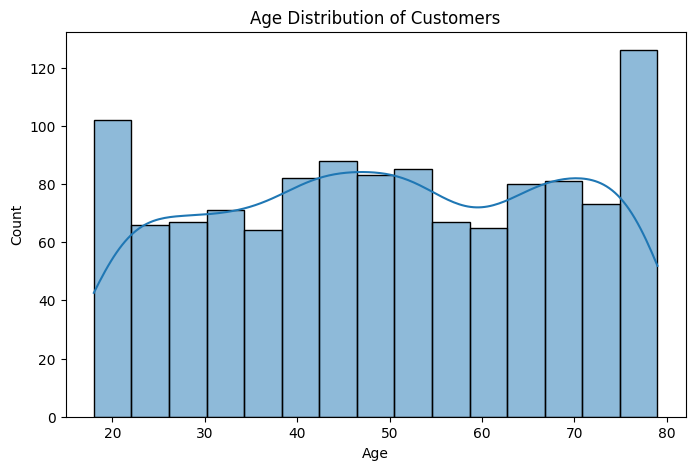

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=15, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


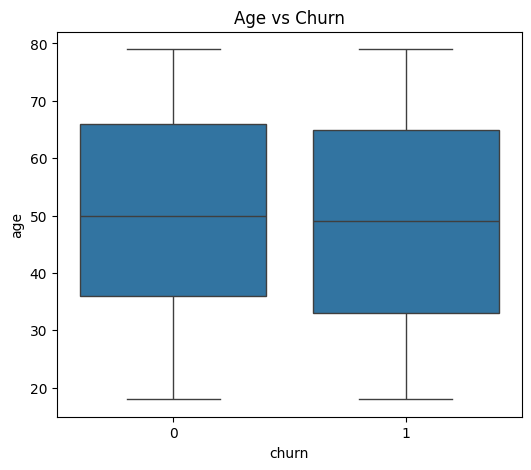

In [15]:
plt.figure(figsize=(6,5))
sns.boxplot(x='churn', y='age', data=df)
plt.title('Age vs Churn')
plt.show()


/tmp/ipython-input-4009270361.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['churn']==1]['age'], label='Churn', shade=True)
/tmp/ipython-input-4009270361.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['churn']==0]['age'], label='No Churn', shade=True)


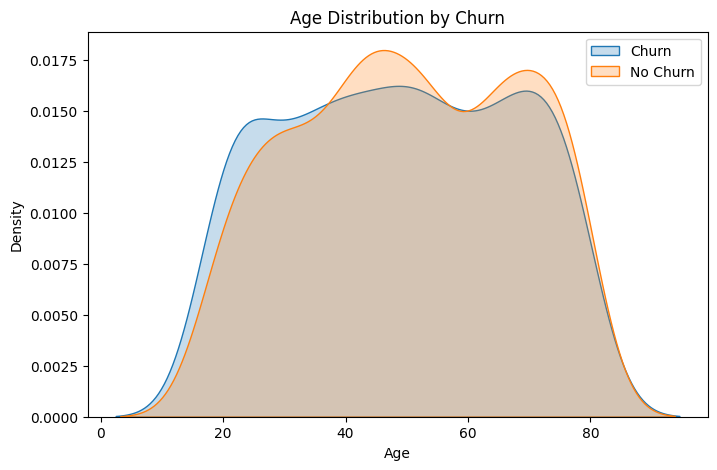

In [16]:
plt.figure(figsize=(8,5))
sns.kdeplot(df[df['churn']==1]['age'], label='Churn', shade=True)
sns.kdeplot(df[df['churn']==0]['age'], label='No Churn', shade=True)
plt.title('Age Distribution by Churn')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()


In [18]:
from sklearn.linear_model import LinearRegression
import numpy as np

# X must be 2D
X = df[['age']]  # predictor
y = df['churn']  # target

model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

print(f"Linear regression equation: churn = {slope:.4f}*age + {intercept:.4f}")



Linear regression equation: churn = -0.0011*age + 0.5350


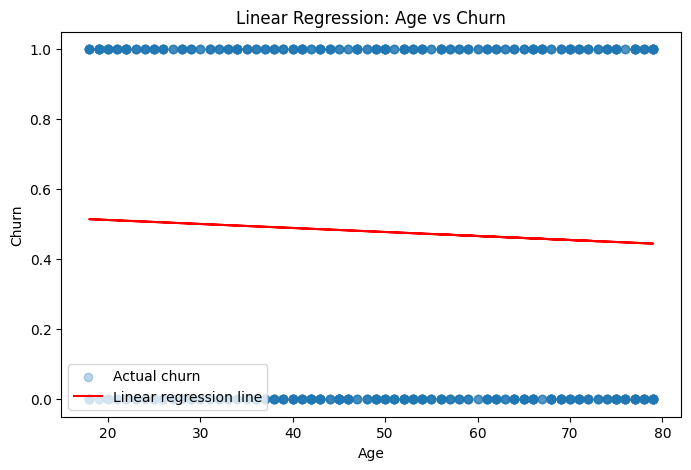

In [19]:
import matplotlib.pyplot as plt

# Predicted values
y_pred = model.predict(X)

plt.figure(figsize=(8,5))
plt.scatter(df['age'], df['churn'], alpha=0.3, label='Actual churn')
plt.plot(df['age'], y_pred, color='red', label='Linear regression line')
plt.xlabel('Age')
plt.ylabel('Churn')
plt.title('Linear Regression: Age vs Churn')
plt.legend()
plt.show()


## Tenure Months Column

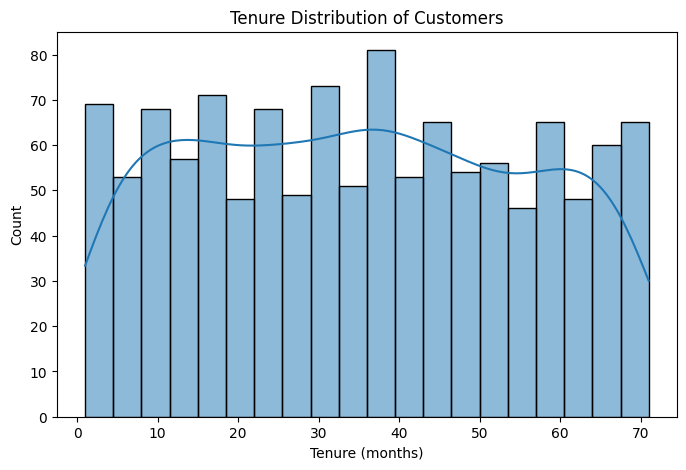

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df['tenure_months'], bins=20, kde=True)
plt.title('Tenure Distribution of Customers')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.show()


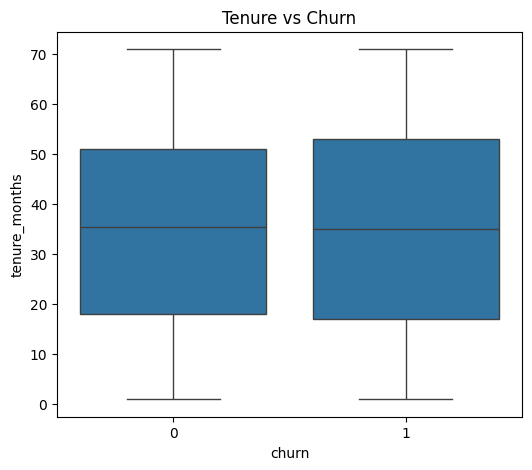

In [21]:
plt.figure(figsize=(6,5))
sns.boxplot(x='churn', y='tenure_months', data=df)
plt.title('Tenure vs Churn')
plt.show()


/tmp/ipython-input-3640286940.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['churn']==1]['tenure_months'], label='Churn', shade=True)
/tmp/ipython-input-3640286940.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['churn']==0]['tenure_months'], label='No Churn', shade=True)


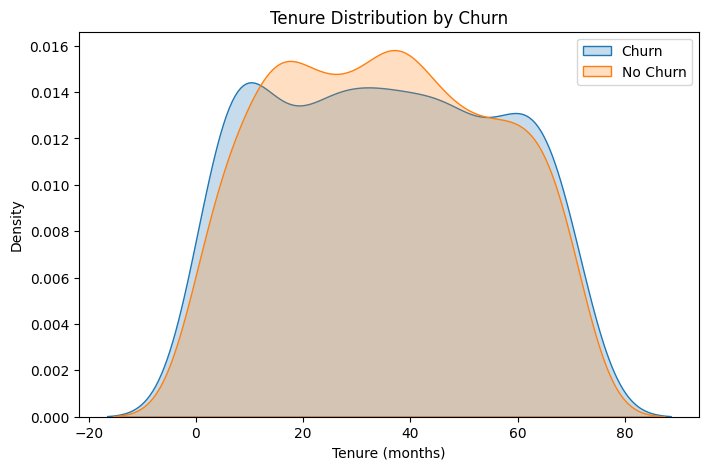

In [22]:
plt.figure(figsize=(8,5))
sns.kdeplot(df[df['churn']==1]['tenure_months'], label='Churn', shade=True)
sns.kdeplot(df[df['churn']==0]['tenure_months'], label='No Churn', shade=True)
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (months)')
plt.legend()
plt.show()


In [23]:
print("Correlation between tenure and churn:", df['tenure_months'].corr(df['churn']))


Correlation between tenure and churn: -0.0015772994087145389


In [25]:
from sklearn.linear_model import LinearRegression

X = df[['tenure_months']]
y = df['churn']

model = LinearRegression()
model.fit(X, y)

print(f"churn = {model.coef_[0]:.4f} * tenure_months + {model.intercept_:.4f}")


churn = -0.0000 * tenure_months + 0.4797


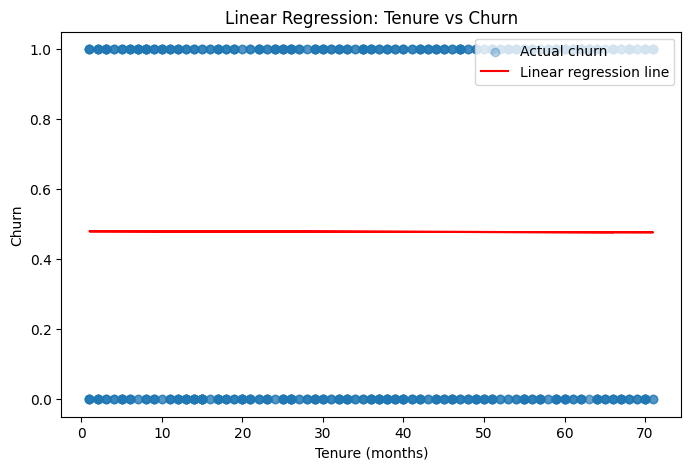

In [26]:
# Predicted churn values
y_pred = model.predict(X)

plt.figure(figsize=(8,5))

# Scatter plot of actual data
plt.scatter(df['tenure_months'], df['churn'], alpha=0.3, label='Actual churn')

# Regression line
plt.plot(df['tenure_months'], y_pred, color='red', label='Linear regression line')

plt.xlabel('Tenure (months)')
plt.ylabel('Churn')
plt.title('Linear Regression: Tenure vs Churn')
plt.legend()
plt.show()


L’analisi della variabile tenure_months non mostra una relazione significativa con il churn.
La distribuzione della tenure è abbastanza uniforme tra 1 e 71 mesi.

Dal boxplot e dai grafici di densità emerge che i clienti che effettuano churn e quelli che rimangono attivi presentano valori di tenure molto simili, senza differenze rilevanti.

Anche la regressione lineare conferma questa evidenza:
churn = -0.0000 × tenure_months + 0.4797,
con un coefficiente praticamente nullo.

Conclusione: in questo dataset la durata del rapporto con il cliente non sembra essere un fattore determinante per spiegare il churn.

## Monthly Charge

In [27]:
print(df['monthly_charge'].describe())


count    1200.000000
mean       68.086167
std        30.682971
min        15.020000
25%        40.422500
50%        69.625000
75%        94.722500
max       119.970000
Name: monthly_charge, dtype: float64


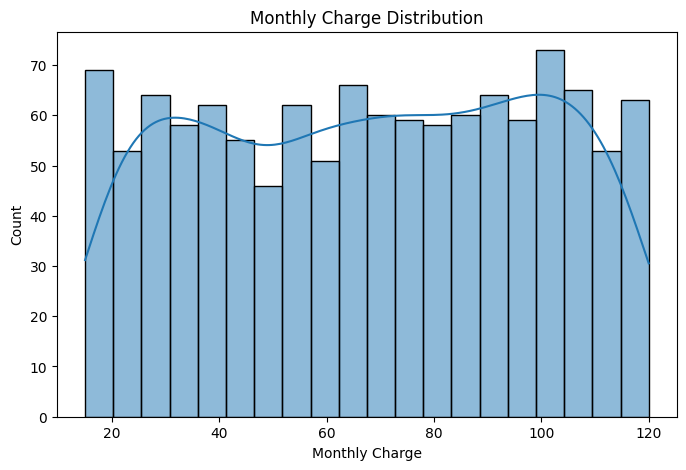

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(df['monthly_charge'], bins=20, kde=True)
plt.title('Monthly Charge Distribution')
plt.xlabel('Monthly Charge')
plt.ylabel('Count')
plt.show()


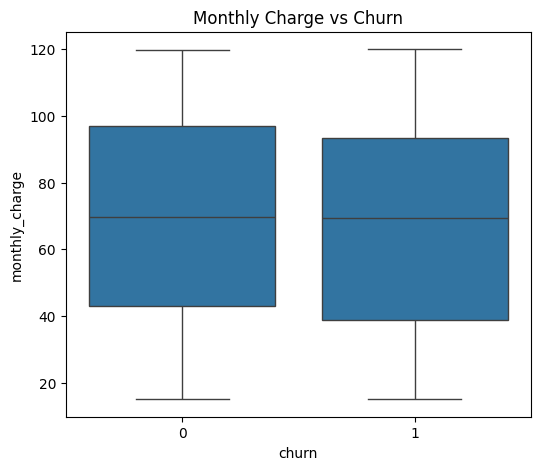

In [29]:
plt.figure(figsize=(6,5))
sns.boxplot(x='churn', y='monthly_charge', data=df)
plt.title('Monthly Charge vs Churn')
plt.show()


/tmp/ipython-input-2676302987.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['churn']==1]['monthly_charge'], label='Churn', shade=True)
/tmp/ipython-input-2676302987.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['churn']==0]['monthly_charge'], label='No Churn', shade=True)


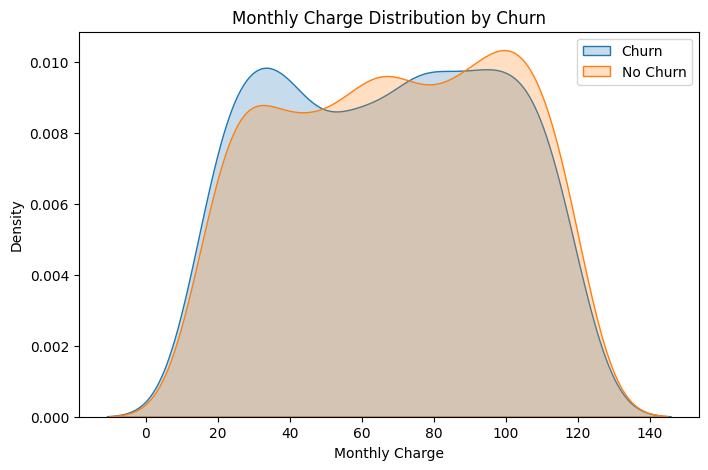

In [30]:
plt.figure(figsize=(8,5))
sns.kdeplot(df[df['churn']==1]['monthly_charge'], label='Churn', shade=True)
sns.kdeplot(df[df['churn']==0]['monthly_charge'], label='No Churn', shade=True)
plt.title('Monthly Charge Distribution by Churn')
plt.xlabel('Monthly Charge')
plt.legend()
plt.show()


In [31]:
from sklearn.linear_model import LinearRegression

X = df[['monthly_charge']]
y = df['churn']

model = LinearRegression()
model.fit(X, y)

print(f"Regression equation: churn = {model.coef_[0]:.4f} * monthly_charge + {model.intercept_:.4f}")


Regression equation: churn = -0.0006 * monthly_charge + 0.5174


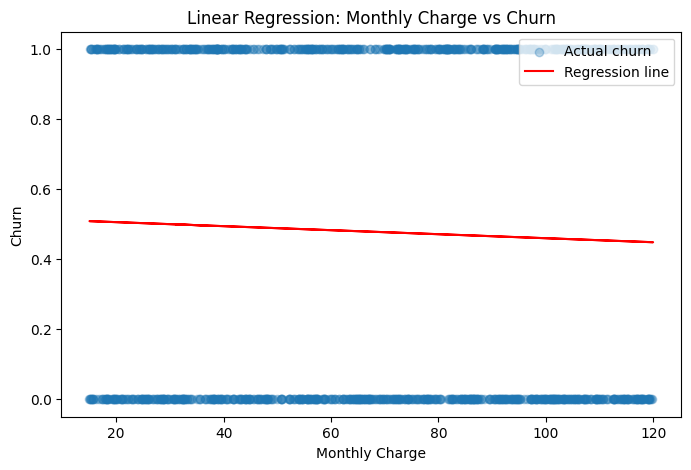

In [32]:
y_pred = model.predict(X)

plt.figure(figsize=(8,5))
plt.scatter(df['monthly_charge'], df['churn'], alpha=0.3, label='Actual churn')
plt.plot(df['monthly_charge'], y_pred, color='red', label='Regression line')
plt.xlabel('Monthly Charge')
plt.ylabel('Churn')
plt.title('Linear Regression: Monthly Charge vs Churn')
plt.legend()
plt.show()


L’analisi della variabile monthly_charge non evidenzia una relazione significativa con il churn.
La distribuzione dei costi mensili è uniforme tra circa 15 e 120, senza concentrazioni particolari.

Dal boxplot e dai grafici di densità si osserva che i clienti churned e non churned presentano valori di costo mensile molto simili, con distribuzioni quasi sovrapposte.

Anche la regressione lineare conferma questa evidenza:
churn = -0.0006 × monthly_charge + 0.5174,
con un coefficiente molto vicino a zero.

Conclusione: il costo mensile non sembra essere un fattore determinante per spiegare il churn in questo dataset.

## Contract type Column

In [34]:
#Before plotting, always check the original options:

print(df['contract_type'].value_counts())

contract_type
1    725
2    305
3    170
Name: count, dtype: int64


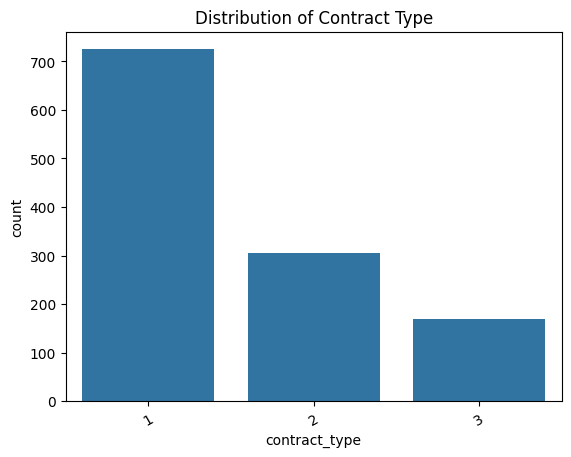

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='contract_type', data=df)
plt.title('Distribution of Contract Type')
plt.xticks(rotation=30)
plt.show()


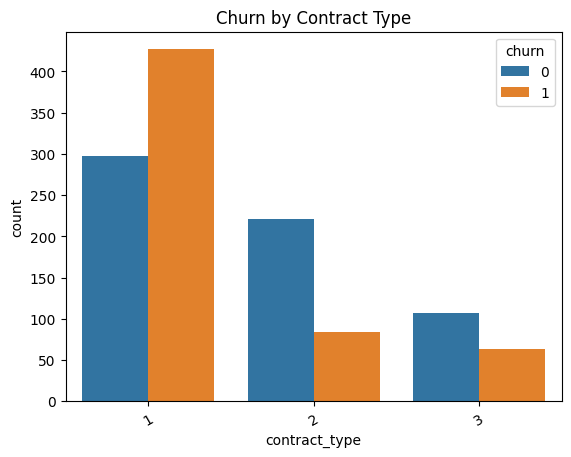

In [37]:
sns.countplot(x='contract_type', hue='churn', data=df)
plt.title('Churn by Contract Type')
plt.xticks(rotation=30)
plt.show()


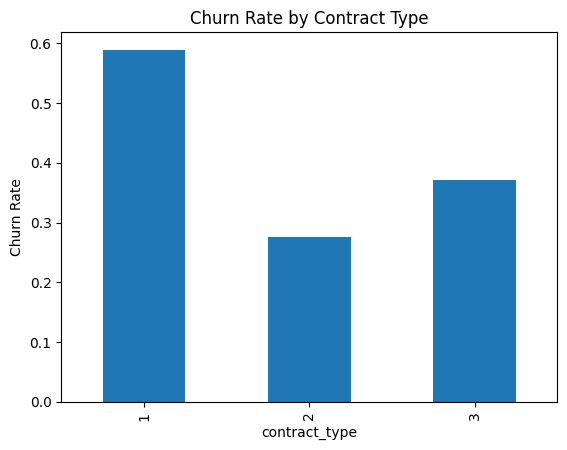

In [38]:
churn_rate = df.groupby('contract_type')['churn'].mean()

churn_rate.plot(kind='bar')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Contract Type')
plt.show()


L’analisi della variabile contract_type evidenzia una relazione molto forte con il churn.
In origine la variabile era categorica con tre valori testuali, che sono stati codificati numericamente come segue:

1 = Month-to-month

2 = One year

3 = Two year

Dai grafici emerge che la tipologia di contratto influenza in modo significativo il comportamento dei clienti:

I clienti con contratto Month-to-month (tipo 1) presentano il tasso di churn più elevato, circa 59%.

I clienti con contratto One year (tipo 2) mostrano il tasso di churn più basso, circa 28%, risultando quindi i più fedeli.

I clienti con contratto Two year (tipo 3) hanno un churn intermedio, intorno al 37%.

Conclusione:
La maggior parte dei clienti che abbandonano il servizio appartiene ai contratti Month-to-month, mentre i clienti che rimangono attivi sono principalmente quelli con contratti annuali o biennali.

La tipologia di contratto risulta quindi uno dei fattori più rilevanti per spiegare e prevedere il churn.

## Internet Service Column

In [63]:
print(df['internet_service'].unique())


[1 3 2]


In [64]:
mapping = {
    1: 'DSL',
    2: 'Fiber optic',
    3: 'Data not avalable'
}

df['internet_service_label'] = df['internet_service'].map(mapping)


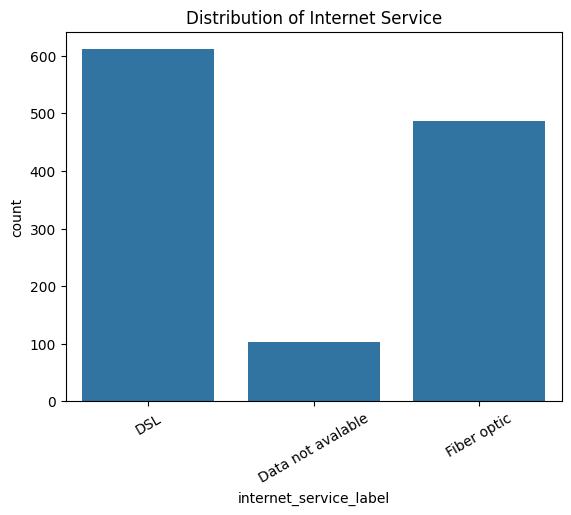

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='internet_service_label', data=df)
plt.title('Distribution of Internet Service')
plt.xticks(rotation=30)
plt.show()


In [66]:
print(df['internet_service'].value_counts())


internet_service
1    611
2    486
3    103
Name: count, dtype: int64


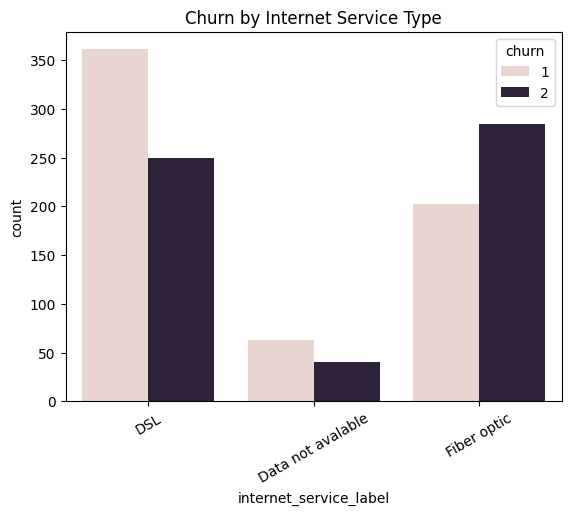

In [67]:
sns.countplot(x='internet_service_label', hue='churn', data=df)
plt.title('Churn by Internet Service Type')
plt.xticks(rotation=30)
plt.show()


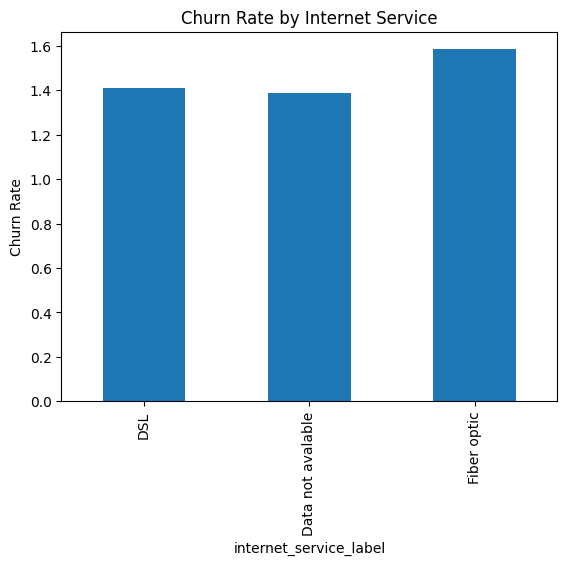

In [68]:
churn_rate = df.groupby('internet_service_label')['churn'].mean()

churn_rate.plot(kind='bar')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Internet Service')
plt.show()


L’analisi della variabile internet_service mostra alcune differenze nel comportamento di churn.

Dal grafico di distribuzione emerge che la maggior parte dei clienti utilizza servizi DSL o Fiber optic, mentre una parte minore rientra nella categoria “Data not available”.

Analizzando il churn per tipologia di servizio, si osserva che:

I clienti con Fiber optic presentano il tasso di churn più elevato

I clienti DSL mostrano un churn simile ma leggermente inferiore

La categoria Data not available ha un churn relativamente più basso

Conclusione: la tipologia di servizio internet ha un certo impatto sul churn, anche se l’effetto risulta meno marcato rispetto a quello osservato per la variabile contract_type.

## Tech Support Column

In [69]:
print(df['tech_support'].unique())
print(df['tech_support'].value_counts())


[1 2]
tech_support
1    812
2    388
Name: count, dtype: int64


In [71]:
mapping = {
    1: 'No Tech Support',
    2: 'Has Tech Support'
}

df['tech_support_label'] = df['tech_support'].map(mapping)


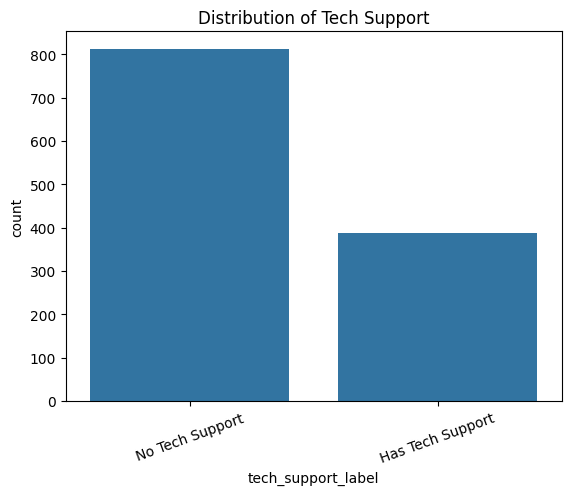

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='tech_support_label', data=df)
plt.title('Distribution of Tech Support')
plt.xticks(rotation=20)
plt.show()


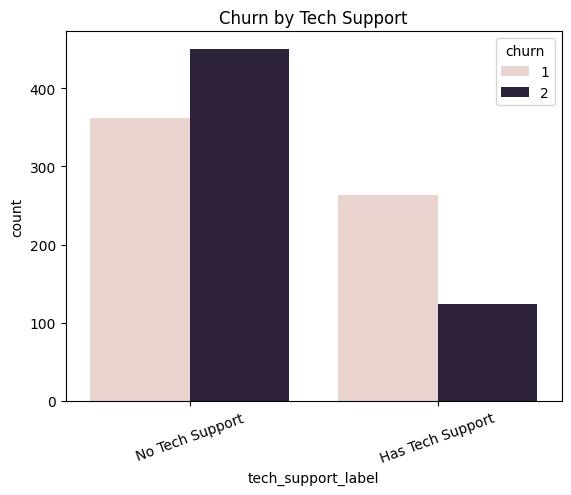

In [73]:
sns.countplot(x='tech_support_label', hue='churn', data=df)
plt.title('Churn by Tech Support')
plt.xticks(rotation=20)
plt.show()


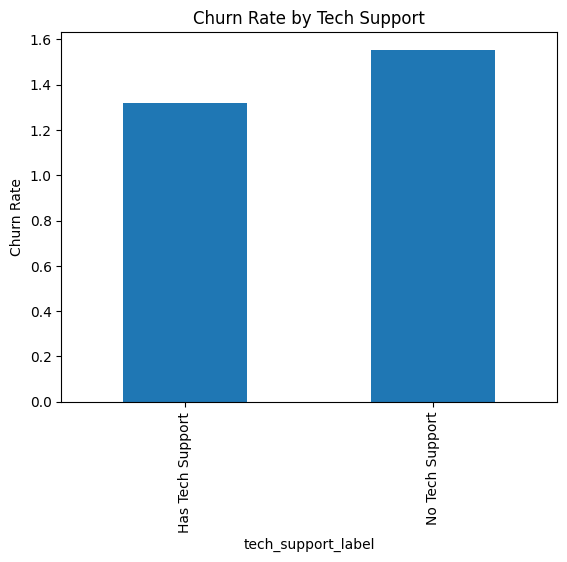

In [74]:
churn_rate = df.groupby('tech_support_label')['churn'].mean()

churn_rate.plot(kind='bar')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Tech Support')
plt.show()


L’analisi della variabile tech_support evidenzia una relazione molto forte con il churn.

Dal grafico di distribuzione emerge che la maggior parte dei clienti (circa due terzi) non dispone del servizio di supporto tecnico.

Analizzando il churn per questa variabile si osserva una differenza molto marcata:

I clienti senza supporto tecnico presentano un numero molto più elevato di abbandoni

I clienti con supporto tecnico mostrano un tasso di churn nettamente inferiore

Il grafico del churn rate conferma chiaramente che l’assenza di supporto tecnico è associata a una probabilità molto maggiore di abbandono del servizio.

Conclusione: la presenza di supporto tecnico rappresenta uno dei fattori più importanti per la fidelizzazione dei clienti.

## Streaming TV Column

In [75]:
print(df['streaming_tv'].unique())
print(df['streaming_tv'].value_counts())


[1 2]
streaming_tv
2    609
1    591
Name: count, dtype: int64


In [76]:
mapping = {
    1: 'No Streaming TV',
    2: 'Has Streaming TV'
}

df['streaming_tv_label'] = df['streaming_tv'].map(mapping)


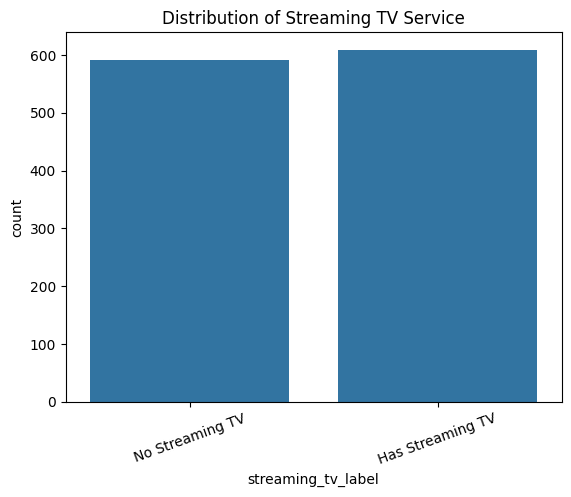

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='streaming_tv_label', data=df)
plt.title('Distribution of Streaming TV Service')
plt.xticks(rotation=20)
plt.show()


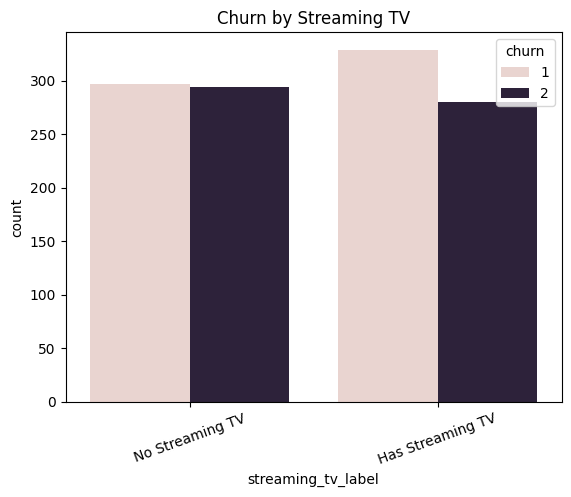

In [78]:
sns.countplot(x='streaming_tv_label', hue='churn', data=df)
plt.title('Churn by Streaming TV')
plt.xticks(rotation=20)
plt.show()


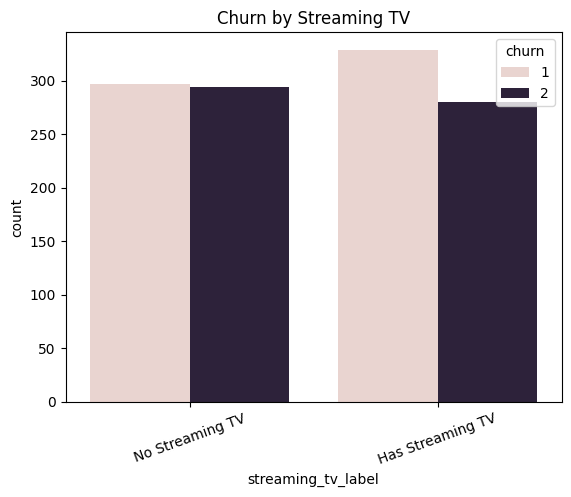

In [79]:
sns.countplot(x='streaming_tv_label', hue='churn', data=df)
plt.title('Churn by Streaming TV')
plt.xticks(rotation=20)
plt.show()


L’analisi della variabile streaming_tv non evidenzia differenze significative nel comportamento di churn.

Dal grafico di distribuzione emerge che i clienti sono suddivisi in modo abbastanza equilibrato tra chi possiede il servizio di streaming TV e chi non lo possiede.

Tuttavia, confrontando i tassi di churn tra le due categorie, non si osservano variazioni rilevanti: i clienti con streaming TV e quelli senza streaming TV mostrano probabilità di abbandono molto simili.

Conclusione: la presenza o assenza del servizio di streaming TV non sembra avere un impatto significativo sul churn e quindi non rappresenta una variabile utile per prevedere l’abbandono dei clienti.

## Payment Method Column

In [85]:
print("Number of customers per payment method:")
print(df['payment_method_label'].value_counts())



Number of customers per payment method:
payment_method_label
Bank transfer       462
Electronic check    324
Credit card         230
Mailed check        184
Name: count, dtype: int64


In [86]:
print("Churn counts by payment method:")
print(pd.crosstab(df['payment_method_label'], df['churn']))



Churn counts by payment method:
churn                   1    2
payment_method_label          
Bank transfer         240  222
Credit card           123  107
Electronic check      174  150
Mailed check           89   95


In [87]:
print("Churn rate by payment method:")
print(df.groupby('payment_method_label')['churn'].mean())



Churn rate by payment method:
payment_method_label
Bank transfer       1.480519
Credit card         1.465217
Electronic check    1.462963
Mailed check        1.516304
Name: churn, dtype: float64


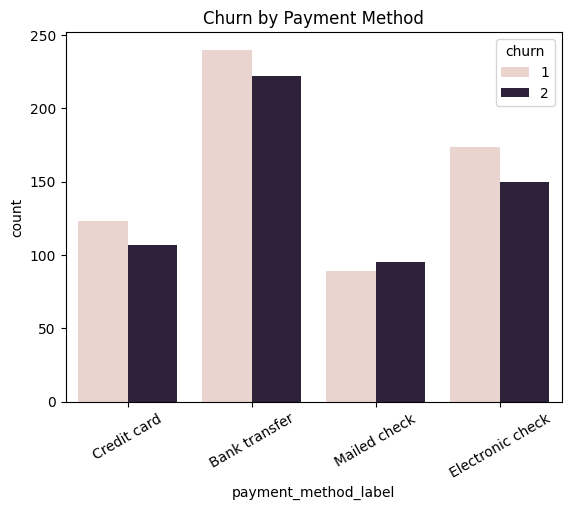


=== PAYMENT METHOD ANALYSIS ===

Value counts:
payment_method_label
Bank transfer       462
Electronic check    324
Credit card         230
Mailed check        184
Name: count, dtype: int64

Churn counts:
churn                   1    2
payment_method_label          
Bank transfer         240  222
Credit card           123  107
Electronic check      174  150
Mailed check           89   95

Churn rates:
payment_method_label
Bank transfer       1.480519
Credit card         1.465217
Electronic check    1.462963
Mailed check        1.516304
Name: churn, dtype: float64


In [88]:
sns.countplot(x='payment_method_label', hue='churn', data=df)
plt.title('Churn by Payment Method')
plt.xticks(rotation=30)
plt.show()

print("\n=== PAYMENT METHOD ANALYSIS ===\n")

print("Value counts:")
print(df['payment_method_label'].value_counts())

print("\nChurn counts:")
print(pd.crosstab(df['payment_method_label'], df['churn']))

print("\nChurn rates:")
print(df.groupby('payment_method_label')['churn'].mean())


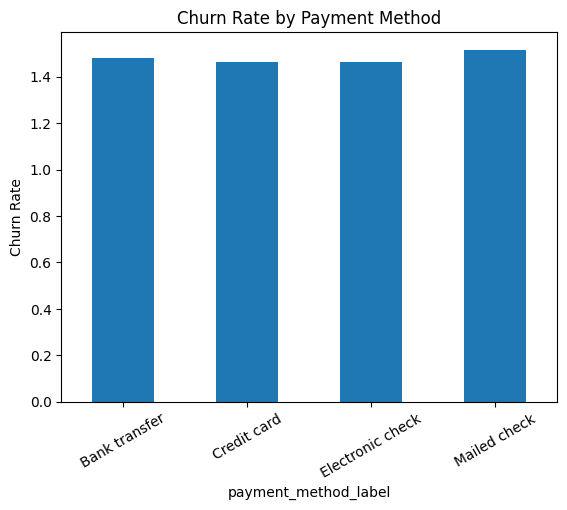

In [84]:
churn_rate = df.groupby('payment_method_label')['churn'].mean()

churn_rate.plot(kind='bar')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Payment Method')
plt.xticks(rotation=30)
plt.show()


L’analisi della variabile payment_method mostra differenze relativamente limitate nel comportamento di churn.

Dal grafico di distribuzione emerge che il metodo di pagamento più utilizzato è il bank transfer, seguito da electronic check, credit card e mailed check.

Analizzando il churn per metodo di pagamento, si osserva che:

Tutti i metodi presentano tassi di churn abbastanza simili

Non esiste un metodo di pagamento che si distingua chiaramente come particolarmente rischioso o particolarmente sicuro

Le differenze tra le categorie sono modeste rispetto a quelle osservate per contract_type o tech_support

Conclusione: il metodo di pagamento ha un impatto limitato sul churn e non rappresenta un fattore determinante rispetto ad altre variabili analizzate.

## Number Support Ticket

In [89]:
print(df['num_support_tickets'].describe())


count    1200.000000
mean        2.001667
std         1.446285
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         7.000000
Name: num_support_tickets, dtype: float64


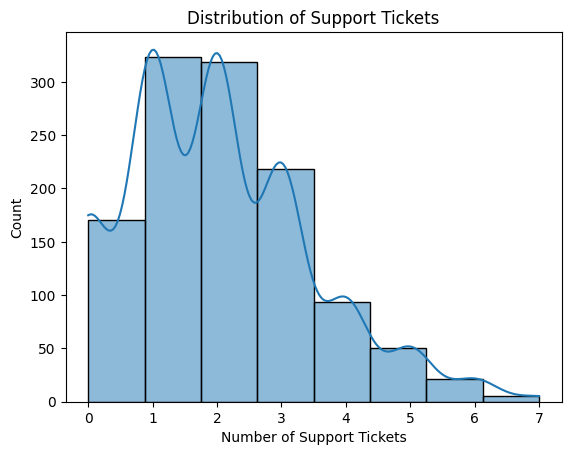

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['num_support_tickets'], bins=8, kde=True)
plt.title('Distribution of Support Tickets')
plt.xlabel('Number of Support Tickets')
plt.show()


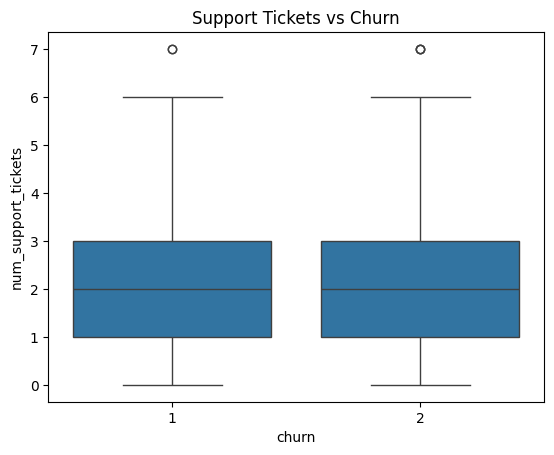

In [91]:
sns.boxplot(x='churn', y='num_support_tickets', data=df)
plt.title('Support Tickets vs Churn')
plt.show()


In [92]:
from sklearn.linear_model import LinearRegression

X = df[['num_support_tickets']]
y = df['churn']

model = LinearRegression()
model.fit(X, y)

print(f"Regression equation: churn = {model.coef_[0]:.4f} * num_support_tickets + {model.intercept_:.4f}")


Regression equation: churn = 0.0463 * num_support_tickets + 1.3857


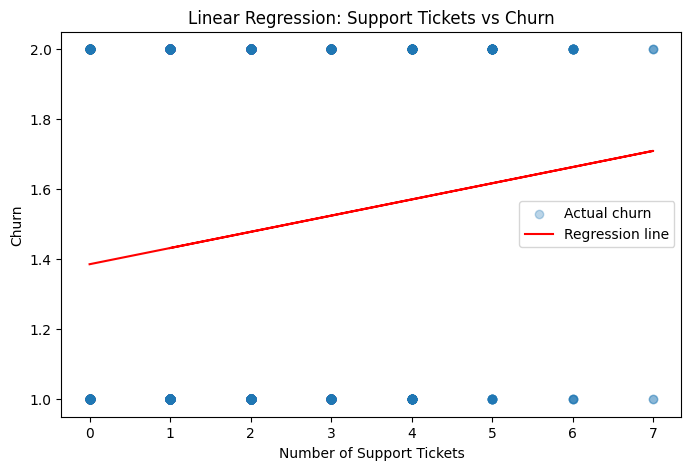

In [93]:
y_pred = model.predict(X)

plt.figure(figsize=(8,5))
plt.scatter(df['num_support_tickets'], df['churn'], alpha=0.3, label='Actual churn')
plt.plot(df['num_support_tickets'], y_pred, color='red', label='Regression line')
plt.xlabel('Number of Support Tickets')
plt.ylabel('Churn')
plt.title('Linear Regression: Support Tickets vs Churn')
plt.legend()
plt.show()


In [94]:
print("Correlation with churn:",
      df['num_support_tickets'].corr(df['churn']))


Correlation with churn: 0.13390729221779238


L’analisi della variabile num_support_tickets mostra una relazione positiva con il churn, seppur di intensità moderata.

Dal grafico di distribuzione emerge che la maggior parte dei clienti apre tra 0 e 3 ticket di supporto, mentre valori più elevati sono meno frequenti.

Il boxplot indica che i clienti che effettuano churn tendono ad avere un numero leggermente maggiore di ticket rispetto a quelli che rimangono attivi.

La correlazione calcolata tra numero di ticket e churn è pari a 0.1339, valore positivo che conferma che all’aumentare delle richieste di assistenza cresce la probabilità di abbandono, anche se la relazione non è molto forte.

Conclusione: il numero di ticket di supporto rappresenta un segnale utile per individuare clienti a rischio churn, ma da solo non è sufficiente a spiegare completamente il fenomeno.

##Task 3 Trova insight di business interessanti

Dall’analisi esplorativa del dataset emergono risultati molto chiari.

Le variabili che influenzano maggiormente il churn sono contract_type e tech_support.
I clienti con contratti flessibili (month-to-month) e senza supporto tecnico presentano probabilità di abbandono significativamente più elevate rispetto ai clienti con contratti a lungo termine e con assistenza tecnica attiva.

Un impatto moderato è stato riscontrato per internet_service e num_support_tickets, indicando che il tipo di servizio utilizzato e la frequenza di problemi tecnici contribuiscono in parte al rischio di churn.

Al contrario, variabili come age, tenure_months, monthly_charge, streaming_tv e payment_method non mostrano relazioni significative con il churn e risultano quindi poco utili per prevedere l’abbandono.

Conclusione generale:
Il churn dei clienti è guidato principalmente da fattori legati all’esperienza di servizio e alla tipologia di contratto, più che da caratteristiche demografiche o economiche.

Le azioni più efficaci per ridurre il churn dovrebbero quindi concentrarsi su:

promuovere contratti a lungo termine

migliorare e diffondere il supporto tecnico

monitorare proattivamente i clienti con numerosi ticket di assistenza

## Task 4  Costruisci un modello predittivo per il churn